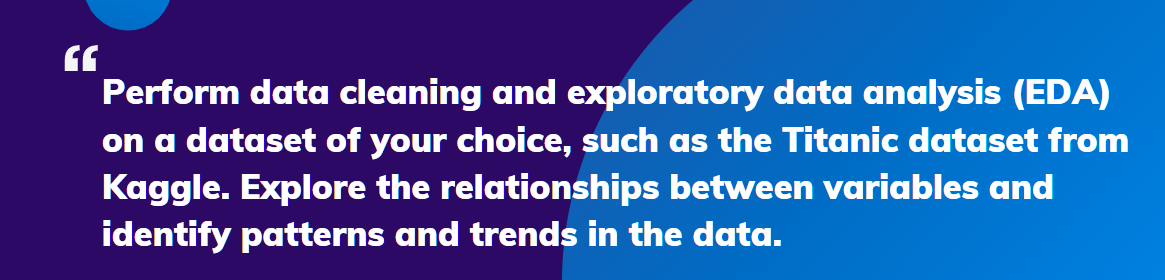

In [1]:
from IPython.display import Image
Image(filename='C:/Users/Pradeep Mishra/Desktop/task02.png')


## Exploratory Data Analysis on Titanic Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/Pradeep Mishra/Desktop/Task02_DS_Prodify/Titanic_data.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
#checking for missing values
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
#removing the missing values from Age Cabin and Embarked column
data.dropna(subset=['Age', 'Cabin', 'Embarked'], inplace=True)


In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## EDA - Exploratory Data Analysis 

In [8]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [9]:
data['Survived'].value_counts()  

1    167
0    103
Name: Survived, dtype: int64

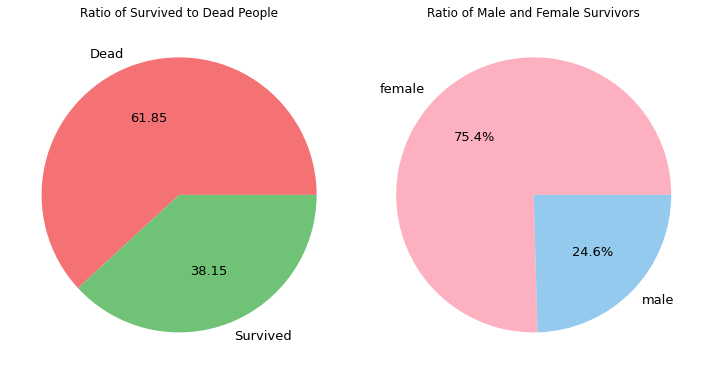

In [10]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the ratio of survived to dead people
axs[0].pie(data['Survived'].value_counts(), labels=['Dead', 'Survived'], autopct="%2.2f",
           colors=['#F47174', '#6FC276'], textprops={'fontsize': 13})
axs[0].set_title("Ratio of Survived to Dead People")

# Plot the ratio of male and female survivors
gender_counts = data[data['Survived'] == 1]['Sex'].value_counts()
axs[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
           colors=['#fdb0c0', '#93CAED'], textprops={'fontsize': 13})
axs[1].set_title("Ratio of Male and Female Survivors")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


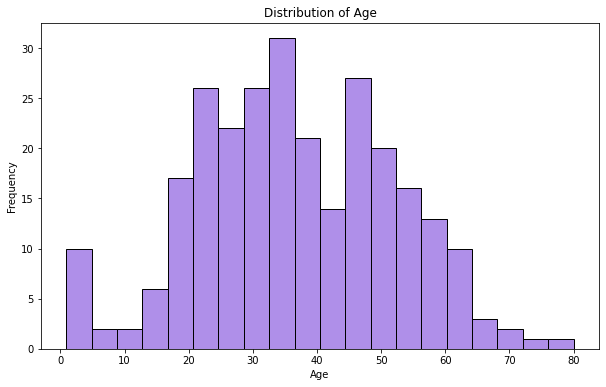

In [11]:
# Create a histogram-like bar graph for age distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Age'].dropna(), bins=20, color='#AF8FE9', edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


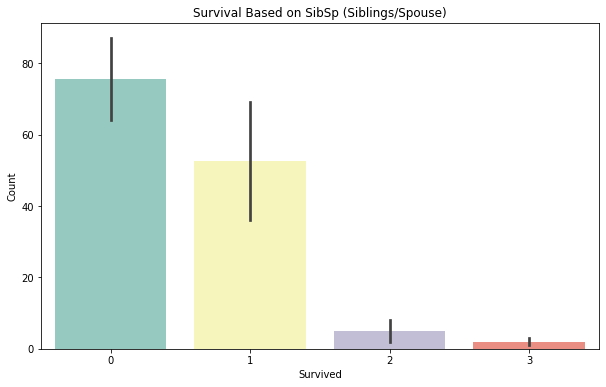

In [12]:
# Create a cross-tabulation table for Survived vs SibSp
cross_tab = pd.crosstab(data['Survived'], data['SibSp'])

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using the cross-tabulation table
sns.barplot(data=cross_tab, palette="Set3")

plt.title('Survival Based on SibSp (Siblings/Spouse)')
plt.xlabel('Survived')
plt.ylabel('Count')


plt.show()

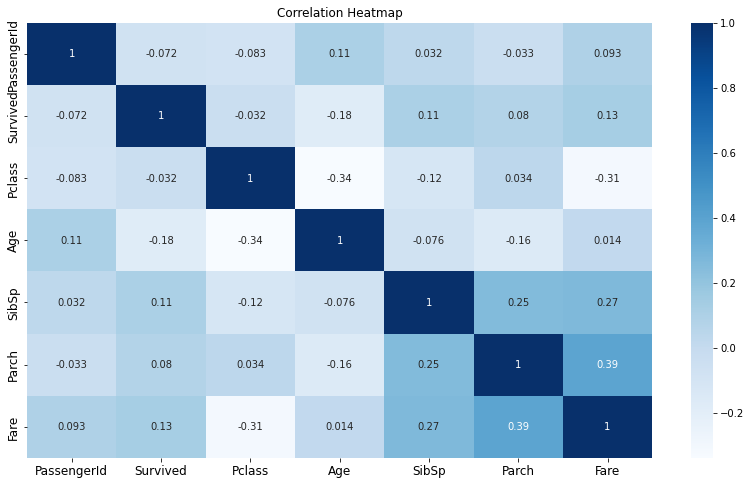

In [13]:
# Set up the figure size
plt.figure(figsize=(14, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(data.corr(), annot=True, cmap="Blues")

plt.title("Correlation Heatmap")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### Author: Shivsagar Mishra 
#### Linkedin: https://linkedin.com/in/shivsagar-mishra/